In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

print("✅ All libraries loaded successfully!")


✅ All libraries loaded successfully!


First few rows of the dataset:
   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

Columns in the dataset: ['user_id', 'timestamp', 'group', 'landing_page', 'converted']

Conversion Summary by Group:
            count    sum  conversion_rate
group                                    
control    147202  17723         0.120399
treatment  147276  17514         0.118920

Z-score: -1.24, p-value: 0.891942
Fail to reject the null hypothesis: no significant improvement detected.

95% Confidence Intervals:
Control group: (0.11873674000172378, 0.12206161871622843)
Treatment group: (0.11726641320754189, 0.12057

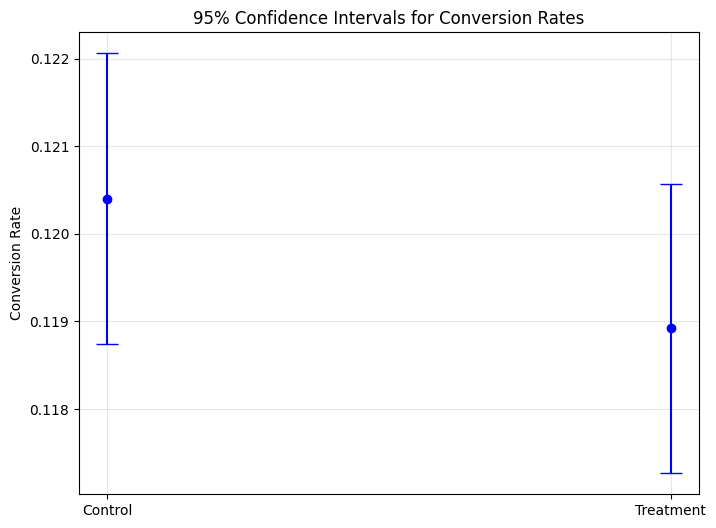


'session_duration' column not found. Skipping T-test.

Required sample size per group for 80% power: 393


In [9]:
# Week 4 - A/B Testing Analysis

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from statsmodels.stats.power import TTestIndPower

# Step 1: Load data
df = pd.read_csv("ab_data.csv")
print("First few rows of the dataset:")
print(df.head())

print("\nColumns in the dataset:", df.columns.tolist())

# Step 2: Summary statistics
summary = df.groupby('group')['converted'].agg(['count', 'sum'])
summary['conversion_rate'] = summary['sum'] / summary['count']
print("\nConversion Summary by Group:")
print(summary)

# Extract values for testing
conv_control = summary.loc['control', 'sum']
conv_treat = summary.loc['treatment', 'sum']
n_control = summary.loc['control', 'count']
n_treat = summary.loc['treatment', 'count']

# Step 3: Two-Proportion Z-Test
z_score, p_value = proportions_ztest([conv_treat, conv_control], [n_treat, n_control], alternative='larger')
print(f"\nZ-score: {z_score:.2f}, p-value: {p_value:.6f}")

if p_value < 0.05:
    print("Reject the null hypothesis: the new design significantly improves conversions.")
else:
    print("Fail to reject the null hypothesis: no significant improvement detected.")

# Step 4: Confidence intervals
ci_control = proportion_confint(conv_control, n_control, alpha=0.05)
ci_treat = proportion_confint(conv_treat, n_treat, alpha=0.05)

print("\n95% Confidence Intervals:")
print(f"Control group: {ci_control}")
print(f"Treatment group: {ci_treat}")

# Step 5: Plot confidence intervals
plt.figure(figsize=(8,6))
plt.errorbar(
    x=[0, 1],
    y=[summary.loc['control','conversion_rate'], summary.loc['treatment','conversion_rate']],
    yerr=[
        [summary.loc['control','conversion_rate'] - ci_control[0], summary.loc['treatment','conversion_rate'] - ci_treat[0]],
        [ci_control[1] - summary.loc['control','conversion_rate'], ci_treat[1] - summary.loc['treatment','conversion_rate']]
    ],
    fmt='o', capsize=8, color='blue'
)
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.ylabel('Conversion Rate')
plt.title('95% Confidence Intervals for Conversion Rates')
plt.grid(alpha=0.3)
plt.show()

# Step 6: T-Test for session duration (if available)
if 'session_duration' in df.columns:
    dur_control = df[df['group'] == 'control']['session_duration']
    dur_treat = df[df['group'] == 'treatment']['session_duration']
    t_stat, p_val = stats.ttest_ind(dur_treat, dur_control)
    print(f"\nT-test (session duration): t = {t_stat:.2f}, p = {p_val:.4f}")
    if p_val < 0.05:
        print("There is a significant difference in session duration between groups.")
    else:
        print("No significant difference in session duration.")
else:
    print("\n'session_duration' column not found. Skipping T-test.")

# Step 7: Power analysis
effect_size = 0.2
power = 0.8
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=0.05)
print(f"\nRequired sample size per group for 80% power: {int(sample_size)}")
